In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

X = df.drop(columns=['target'])
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

svm_original = SVC(kernel='linear', random_state=42)
svm_original.fit(X_train, y_train)
y_pred_original = svm_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

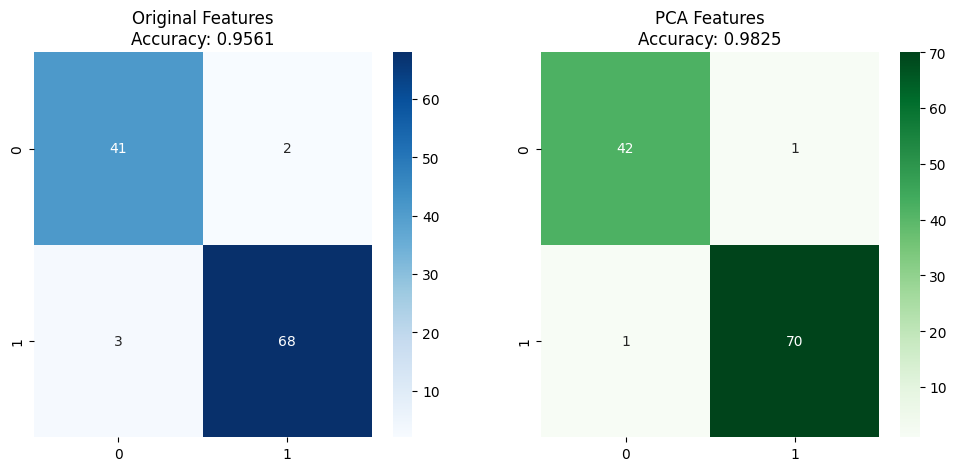

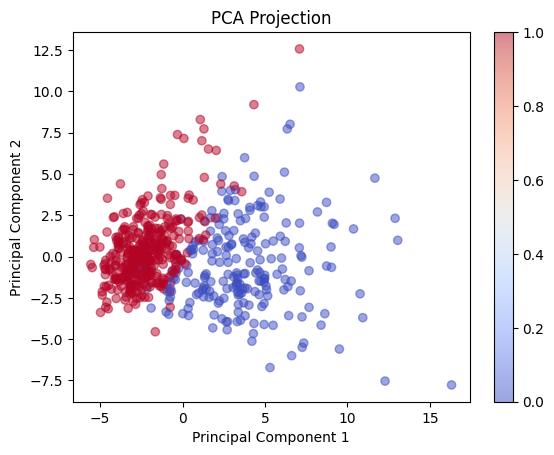

Original SVM Accuracy: 0.9561
PCA SVM Accuracy: 0.9825
Explained Variance by 5 Components: 0.8473


In [3]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_pca = SVC(kernel='linear', random_state=42)
svm_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = svm_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)

conf_matrix_original = confusion_matrix(y_test, y_pred_original)
conf_matrix_pca = confusion_matrix(y_test_pca, y_pred_pca)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Original Features\nAccuracy: {accuracy_original:.4f}')
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f'PCA Features\nAccuracy: {accuracy_pca:.4f}')
plt.show()

pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection')
plt.colorbar()
plt.show()

print(f'Original SVM Accuracy: {accuracy_original:.4f}')
print(f'PCA SVM Accuracy: {accuracy_pca:.4f}')
print(f'Explained Variance by 5 Components: {sum(pca.explained_variance_ratio_):.4f}')